In [1]:
import numpy as np
import pandas as pd
import os
import json
import glob
import matplotlib.pyplot as plt

In [2]:
prof_path = "../code/results_profiling_Oct14/"

In [3]:
runs = []
for run in os.listdir(prof_path):
    with open(os.path.join(prof_path, run, "config.json")) as f:
        config = json.load(f)
    runs.append((config, pd.read_csv(os.path.join(prof_path, run, "profiling.csv"))))

In [4]:
by_train_size = {k['train_size']: v for k, v in runs if k['batch_size'] == 256}

In [5]:
for (train_size, df) in by_train_size.items():
    df['train_size'] = train_size

In [6]:
all_data = pd.concat(by_train_size.values(), axis=0)

In [7]:
all_data.replace(-1.0, np.nan, inplace=True)

In [8]:
all_data[(all_data.dataset == 'fashionmnist') & (all_data.algorithm == 'isomap')]

,dataset,algorithm,time,train_size
10,fashionmnist,isomap,161.284940,70000
10,fashionmnist,isomap,NaN,100000
10,fashionmnist,isomap,9.244687,5000
10,fashionmnist,isomap,41.953510,10000
10,fashionmnist,isomap,0.319166,1000
10,fashionmnist,isomap,NaN,30000


<AxesSubplot:xlabel='train_size'>

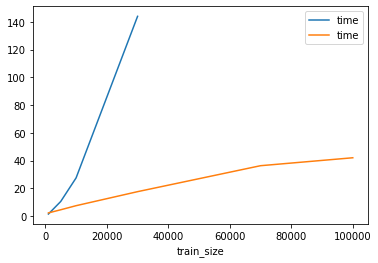

In [9]:
g = all_data.groupby(['dataset', 'algorithm'])
ax = g.get_group(('mnist', 'tsne')).sort_values(by='train_size').plot('train_size', 'time')
g.get_group(('mnist', 'sharp')).sort_values(by='train_size').plot('train_size', 'time', ax=ax)

[<AxesSubplot:title={'center':'fashionmnist'}, xlabel='train_size'>,
 <AxesSubplot:title={'center':'har'}, xlabel='train_size'>,
 <AxesSubplot:title={'center':'mnist'}, xlabel='train_size'>,
 <AxesSubplot:title={'center':'reuters'}, xlabel='train_size'>,
 <AxesSubplot:title={'center':'usps'}, xlabel='train_size'>]

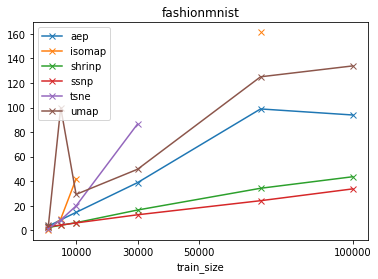

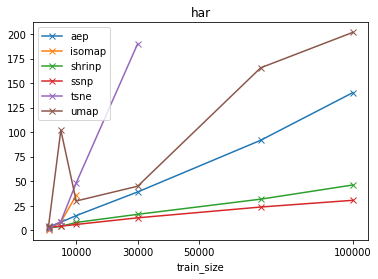

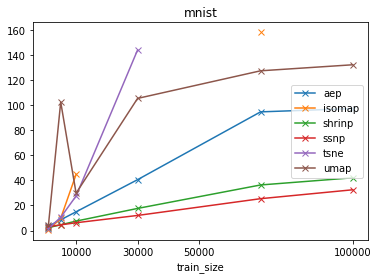

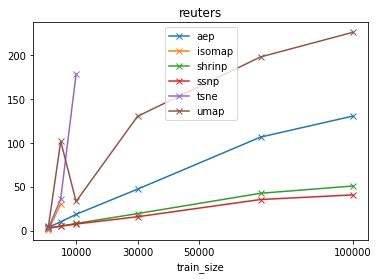

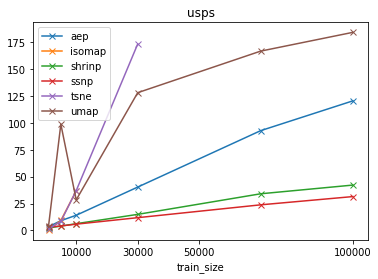

In [10]:
g = all_data.sort_values(by='train_size').groupby(['dataset'])

def plot_dataset(ix, df: pd.DataFrame):
    g_inner = df.sort_values('time', ascending=False).groupby('algorithm')
    fig, ax = plt.subplots(1, 1)
    plt.setp(ax, xticks=[10000, 30000, 50000, 100000], title=ix)
    for method, g_ in g_inner:
        g_.sort_values(by='train_size').plot('train_size', 'time', ax=ax, label=method, marker='x')  # type: ignore
    return ax
[plot_dataset(*g_i) for g_i in g]

In [11]:
all_data[all_data.algorithm == 'isomap'].sort_values(by=['dataset', 'train_size'])

,dataset,algorithm,time,train_size
10,fashionmnist,isomap,0.319166,1000
10,fashionmnist,isomap,9.244687,5000
10,fashionmnist,isomap,41.953510,10000
10,fashionmnist,isomap,NaN,30000
10,fashionmnist,isomap,161.284940,70000
10,fashionmnist,isomap,NaN,100000
4,har,isomap,0.298196,1000
4,har,isomap,8.488819,5000
4,har,isomap,35.562668,10000
4,har,isomap,NaN,30000


In [12]:
all_data_reindexed = all_data.reindex()

In [13]:
all_data_reindexed = all_data.pivot(index=['dataset', 'algorithm', ], columns=['train_size'], values='time').reset_index()

In [14]:
all_data_reindexed.columns

Index(['dataset', 'algorithm', 1000, 5000, 10000, 30000, 70000, 100000], dtype='object', name='train_size')

In [15]:
all_data_reindexed[['10000_r', '30000_r', '50000_r', '70000_r', '100000_r']] = all_data_reindexed[[10000, 30000, 50000, 70000, 100000]].div(all_data_reindexed[10000], axis=0)

KeyError: '[50000] not in index'

In [ ]:
all_data_reindexed

train_size,dataset,algorithm,1000,5000,10000,30000,50000,70000,100000,10000_r,30000_r,50000_r,70000_r,100000_r
0,fashionmnist,aep,3.891240,8.431170,14.069521,38.210278,63.244527,90.561678,91.668306,1.0,2.715819,4.495144,6.436728,6.515382
1,fashionmnist,isomap,0.408171,9.135976,41.063101,NaN,NaN,157.318410,NaN,1.0,NaN,NaN,3.831138,NaN
2,fashionmnist,sharp,2.651578,4.466556,6.036551,15.213657,24.153861,31.927932,41.570729,1.0,2.520256,4.001268,5.289101,6.886503
3,fashionmnist,ssnp,4.907216,14.410604,22.835074,69.232463,115.979340,162.030504,232.999695,1.0,3.031847,5.079000,7.095685,10.203588
4,fashionmnist,tsne,1.504304,10.112944,18.612205,81.796022,163.986072,NaN,NaN,1.0,4.394752,8.810674,NaN,NaN
5,fashionmnist,umap,4.538715,25.671728,25.663310,30.498439,38.307494,46.853481,61.350072,1.0,1.188406,1.492695,1.825699,2.390575
6,har,aep,3.995198,8.801413,13.926348,38.312114,55.627014,81.730595,113.571237,1.0,2.751052,3.994372,5.868774,8.155134
7,har,isomap,0.550431,8.622251,35.258188,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
8,har,sharp,2.730854,5.408535,6.821413,14.410836,21.784126,30.676820,42.969229,1.0,2.112588,3.193492,4.497136,6.299169
9,har,ssnp,5.312602,14.447226,23.125999,68.959291,103.995388,145.980362,208.515205,1.0,2.981895,4.496904,6.312392,9.016484


In [22]:
translate_alg = {
    'aep': 'AE',
    'isomap': "Isomap",
    "sharp": "ShaRP",
    "ssnp": "SSNP",
    "tsne": "t-SNE",
    "umap": "UMAP",
}

alg_to_linestyle = {
    'aep': 'dashed',
    'isomap': 'dotted',
    'sharp':'solid' ,
    'ssnp': 'dashdot',
    'tsne': (5, (10, 3)),
    'umap': (0, (5, 10)),
}

Text(0.5, 1.0, 'HAR')

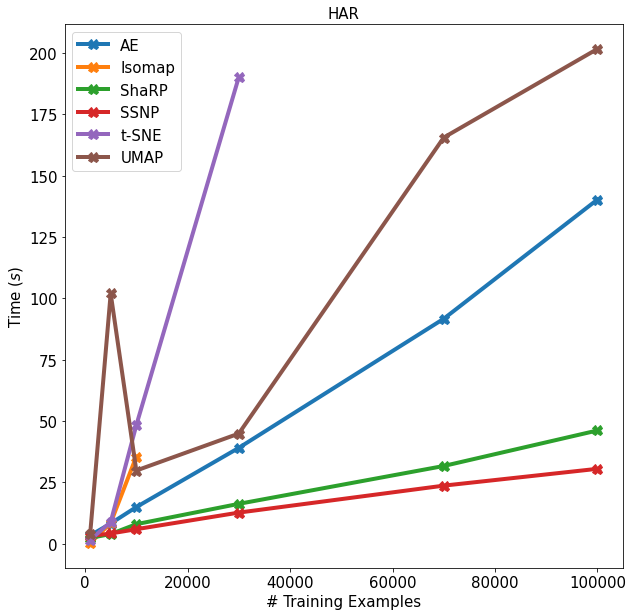

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
grouped = all_data[all_data.dataset == 'har'].sort_values('train_size').groupby(['algorithm'])
for ix, g in grouped:
    g.dropna().plot('train_size', 'time', ax=ax, label=translate_alg[ix], lw=4, marker='X', markersize=10)  # type: ignore
ax.legend(prop={'size': 15})
ax.tick_params('both', labelsize=15)
ax.set_xlabel('# Training Examples', fontsize=15)
ax.set_ylabel('Time ($s$)', fontsize=15)
ax.set_title('HAR', fontsize=15)

Text(0.5, 1.0, 'Reuters')

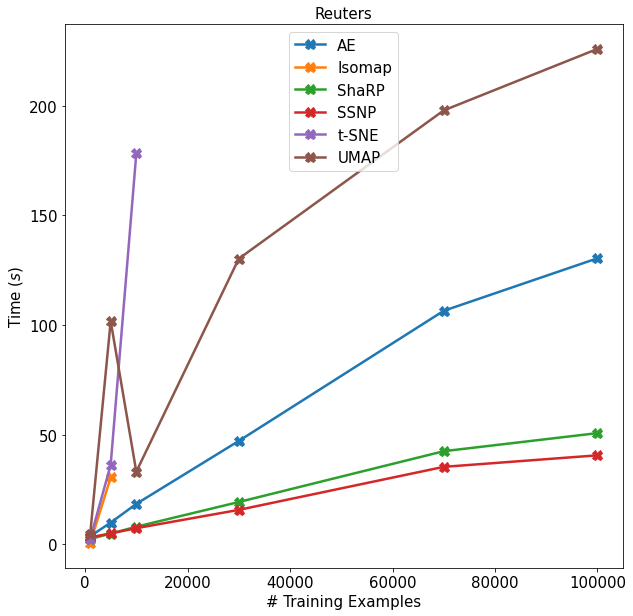

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
grouped = all_data[all_data.dataset == 'reuters'].sort_values('train_size').groupby(['algorithm'])
for ix, g in grouped:
    g.dropna().plot('train_size', 'time', ax=ax, label=translate_alg[ix], lw=2.5, marker='X', markersize=10)  # type: ignore
ax.legend(prop={'size': 15})
ax.tick_params('both', labelsize=15)
ax.set_xlabel('# Training Examples', fontsize=15)
ax.set_ylabel('Time ($s$)', fontsize=15)
ax.set_title('Reuters', fontsize=15)

Text(0.5, 1.0, 'fit_transform Time vs. Number of Training Examples (MNIST)')

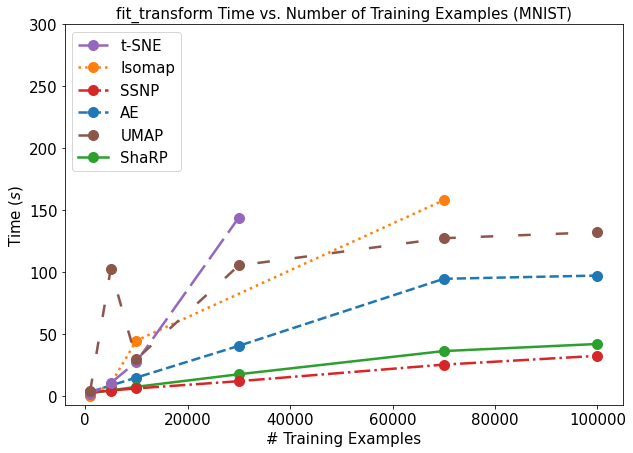

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
grouped = all_data[all_data.dataset == 'mnist'].sort_values('train_size').groupby(['algorithm'])
for ix, g in grouped:
    g.dropna().plot('train_size', 'time', ax=ax, label=translate_alg[ix], lw=2.5, marker='o', markersize=10, linestyle=alg_to_linestyle[ix])  # type: ignore
# ax.set_xscale('log'); ax.set_yscale('log')
ax.set_ylim(-7.0, 300.0)
handles, labels = plt.gca().get_legend_handles_labels()
order = [4, 1, 3, 0, 5, 2]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], prop={'size': 15}, loc='upper left')
ax.tick_params('both', labelsize=15)
ax.set_xlabel('# Training Examples', fontsize=15)
ax.set_ylabel('Time ($s$)', fontsize=15)
ax.set_title('fit_transform Time vs. Number of Training Examples (MNIST)', fontsize=15)
# ax.axis('equal')
# plt.setp(ax, xticks=[10_000, 30_000, 50_000, 70_000, 100_000])


Text(0.5, 1.0, 'fit_transform Time vs. Number of Training Examples (HAR)')

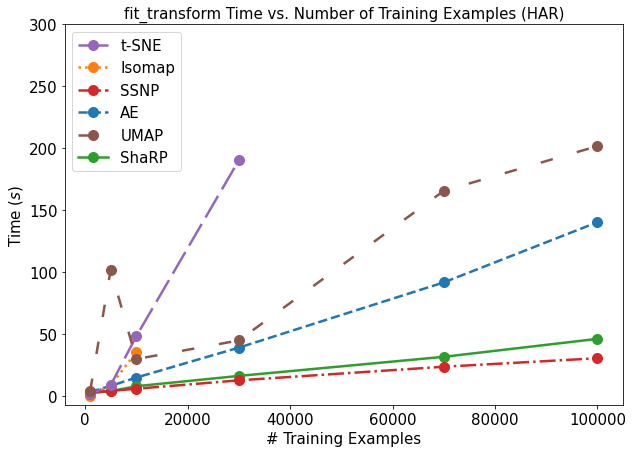

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
grouped = all_data[all_data.dataset == 'har'].sort_values('train_size').groupby(['algorithm'])
for ix, g in grouped:
    g.dropna().plot('train_size', 'time', ax=ax, label=translate_alg[ix], lw=2.5, marker='o', markersize=10, linestyle=alg_to_linestyle[ix])  # type: ignore
# ax.set_xscale('log'); ax.set_yscale('log')
ax.set_ylim(-7.0, 300.0)

handles, labels = plt.gca().get_legend_handles_labels()
order = [4, 1, 3, 0, 5, 2]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], prop={'size': 15}, loc='upper left')
ax.tick_params('both', labelsize=15)
ax.set_xlabel('# Training Examples', fontsize=15)
ax.set_ylabel('Time ($s$)', fontsize=15)
ax.set_title('fit_transform Time vs. Number of Training Examples (HAR)', fontsize=15)
# ax.axis('equal')
# plt.setp(ax, xticks=[10_000, 30_000, 50_000, 70_000, 100_000])

Text(0.5, 1.0, 'fit_transform Time vs. Number of Training Examples (FashionMNIST)')

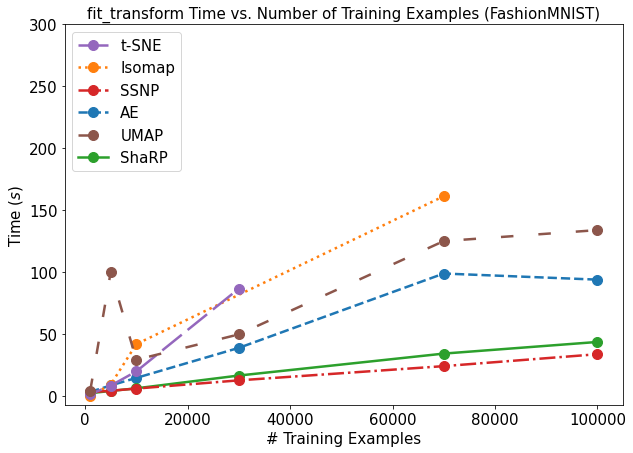

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
grouped = all_data[all_data.dataset == 'fashionmnist'].sort_values('train_size').groupby(['algorithm'])
for ix, g in grouped:
    g.dropna().plot('train_size', 'time', ax=ax, label=translate_alg[ix], lw=2.5, marker='o', markersize=10, linestyle=alg_to_linestyle[ix])  # type: ignore
# ax.set_xscale('log'); ax.set_yscale('log')
ax.set_ylim(-7.0, 300.0)

handles, labels = plt.gca().get_legend_handles_labels()
order = [4, 1, 3, 0, 5, 2]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], prop={'size': 15}, loc='upper left')
ax.tick_params('both', labelsize=15)
ax.set_xlabel('# Training Examples', fontsize=15)
ax.set_ylabel('Time ($s$)', fontsize=15)
ax.set_title('fit_transform Time vs. Number of Training Examples (FashionMNIST)', fontsize=15)
# ax.axis('equal')
# plt.setp(ax, xticks=[10_000, 30_000, 50_000, 70_000, 100_000])

Text(0.5, 1.0, 'fit_transform Time vs. Number of Training Examples (USPS)')

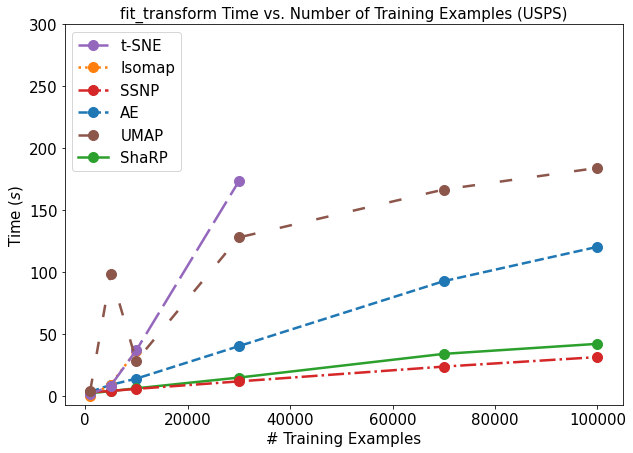

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
grouped = all_data[all_data.dataset == 'usps'].sort_values('train_size').groupby(['algorithm'])
for ix, g in grouped:
    g.dropna().plot('train_size', 'time', ax=ax, label=translate_alg[ix], lw=2.5, marker='o', markersize=10, linestyle=alg_to_linestyle[ix])  # type: ignore
# ax.set_xscale('log'); ax.set_yscale('log')
ax.set_ylim(-7.0, 300.0)

handles, labels = plt.gca().get_legend_handles_labels()
order = [4, 1, 3, 0, 5, 2]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], prop={'size': 15}, loc='upper left')
ax.tick_params('both', labelsize=15)
ax.set_xlabel('# Training Examples', fontsize=15)
ax.set_ylabel('Time ($s$)', fontsize=15)
ax.set_title('fit_transform Time vs. Number of Training Examples (USPS)', fontsize=15)
# ax.axis('equal')
# plt.setp(ax, xticks=[10_000, 30_000, 50_000, 70_000, 100_000])

Text(0.5, 1.0, 'fit_transform Time vs. Number of Training Examples (Reuters)')

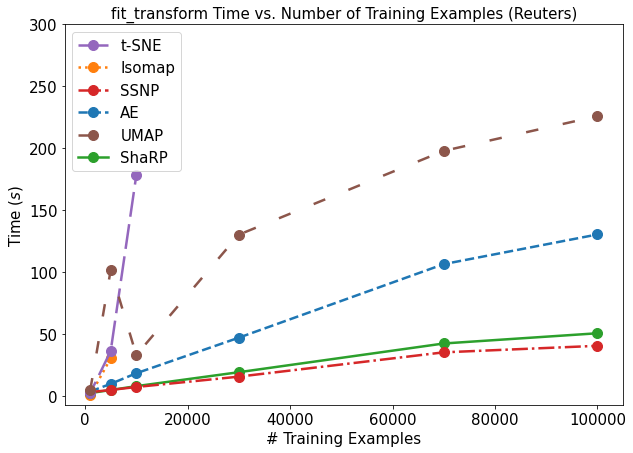

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
grouped = all_data[all_data.dataset == 'reuters'].sort_values('train_size').groupby(['algorithm'])
for ix, g in grouped:
    g.dropna().plot('train_size', 'time', ax=ax, label=translate_alg[ix], lw=2.5, marker='o', markersize=10, linestyle=alg_to_linestyle[ix])  # type: ignore
# ax.set_xscale('log'); ax.set_yscale('log')
ax.set_ylim(-7.0, 300.0)

handles, labels = plt.gca().get_legend_handles_labels()
order = [4, 1, 3, 0, 5, 2]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], prop={'size': 15}, loc='upper left')
ax.tick_params('both', labelsize=15)
ax.set_xlabel('# Training Examples', fontsize=15)
ax.set_ylabel('Time ($s$)', fontsize=15)
ax.set_title('fit_transform Time vs. Number of Training Examples (Reuters)', fontsize=15)
# ax.axis('equal')
# plt.setp(ax, xticks=[10_000, 30_000, 50_000, 70_000, 100_000])